<h1 align="center">Devoir #3 : Équation de Schrödinger</h1>
<h4 align="center">Théo Dionne et Jérôme Leblanc</h4>
<h5 align="center">23 mars 2023</h5>

# L'oscillateur harmonique quantique (OHQ)

Dans plusieurs domaines de la physique, le problème de l'oscillateur harmonique est d'une très grande utilité. En fait, un grand nombre de potentiels symétriques ou quasi-symétriques peuvent être considérés comme étant approximativement des oscillateurs harmoniques. C'est surtout le cas lorsqu'on s'intéresse aux oscillations de petite amplitude autour d'un minimum local d'un potentiel. La mécanique quantique n'est pas une exception à cette observation, car l'étude de l'OHQ permet d'expliquer beaucoup de phénomènes incluant la lumière dans un résonnateur ([modèle de Jaynes-Cummings](https://en.wikipedia.org/wiki/Jaynes%E2%80%93Cummings_model)).

Quoique les solutions analytiques à l'OHQ sont très bien [connues](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator), il est intéressant d'utiliser ce fait pour étalonner des méthodes qui servent à trouver les valeurs propres et les fonctions propres d'un opérateur différentiel. Dans ce qui suit, nous allons comparer deux de ces méthodes grâce à l'OHQ: la méthode du tir (MT) et la méthode des éléments finis (MEF).

In [1]:
import OHQ_wrapper as OHQw # Implémentation MT + MEF ainsi que fonctions graphiques
import matplotlib.pyplot as plt
import numpy as np

# Paramètres graphiques
params = {
    "xtick.top": True, 
    "ytick.right": True, 
    "xtick.direction": "in", 
    "ytick.direction": "in", 
    "figure.dpi": 150
    }
plt.rcParams.update(params)

# Méthode du tir

D'abord, on cherche à résoudre l'équation de Schrödinger pour un OHQ avec la méthode du tir. Le hamiltonien peut être écrit sous la forme suivante:
$$
    {\psi}'' = (x^2-2E)\psi
$$
Comme à l'habitude, pour résoudre cette équation du second ordre, on s'intéresse à un système *réduit* avec le changement de variables typique $\xi \equiv \psi'$:
$$
    \begin{bmatrix}{\psi}'\\{\xi}'\end{bmatrix} = \begin{bmatrix}\xi\\(x^2-2E)\psi\end{bmatrix}
$$
Maintenant, on fixe $\psi(-L)=0$ et ${\psi}'(-L) = 0.001$ pour ensuite trouver par itération les valeurs de $E$ telles que $\psi(L|E)=0$.

N.B.: Pour le cadrage des racines via l'algorithme proposé, il est important d'essayer le cadrage dans les deux sens ($x_1$ qui augmente ou qui diminue), car il n'y a aucune garantie sur les valeurs d'une fonction de part et d'autre d'une racine. En fait, la condition $f(x_1)=-f(x_0)$ peut être problématique pour cette raison. Par expérience, reculer l'intervalle semble mieux garantir des cadres dans ce problème.

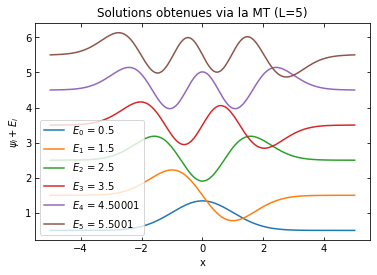

In [2]:
sol_mt = OHQw.solutions_mt(5, 200, 6) # Calcul des 6 premières sols avec la MT

OHQw.faire_graphique(sol_mt, 5, 5, titre = "Solutions obtenues via la MT (L=5)")

# Méthode des éléments finis

La méthode des éléments finis consiste essentiellement à ramener une équation différentielle à un système d'équations linéaires diagonalisable en supposant que les fonctions propres sont approximativement leur projection sur la base des *fonctions tente*. Pour ce faire, on ramène l'équation différentielle sous la forme :
$$
    \frac{1}{2}(x^2 - \partial_x^2)\psi = E\psi
$$
En introduisant sa représentation dans la base des fonctions tente $\left\{\ket{u_i}\right\}$, on peut écrire l'équation sous la forme:
$$
    \mathrm{\mathbf{L}}^C\ket{\psi}=E\mathrm{\mathbf{M}}\ket{\psi}
$$
où $\mathrm{\mathbf{L}}^C$ est la représentation de $(x^2 - \partial_x^2)/2$ et $\mathrm{\mathbf{M}}$ est la *matrice de masse*. Les énergies (valeurs propres) et les états (vecteurs propres) sont trouvés via la résolution de cette équation aux valeurs propres généralisées. Notez bien que puisque l'hamiltonien est un opérateur hermitien, on peut utiliser une méthode qui prend avantage de ce fait.

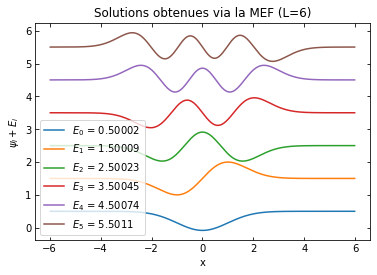

In [3]:
sol_mef = OHQw.solutions_mef(6, 500, 6) # Calcul des 6 premières sols avec la MEF

OHQw.faire_graphique(sol_mef, 5, 5, titre = "Solutions obtenues via la MEF (L=6)")

# Discussion

### Temps d'exécution

En observant rapidement les temps d'exécutions dans le bas des cellules de calcul, on voit que les deux procédures sont du même ordre de temps d'exécution. De ce fait, au point de vue du temps de calcul les implémentations de la MEF et de la MT sont comparables.

### Fonctions propres

Encore une fois, cette section est un peu qualitative, puisque les paramètres demandés pour chaque méthode sont différents. Par contre, on peut tout de même mentionné que *l'allure* des fonctions propres obtenues via les deux méthodes sont visuellement les mêmes que celles fournies dans l'énoncé ou qu'on peut trouver dans des références (comme cet [article wikipédia](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator)). On peut en tirer que les deux méthodes sont qualitativement similaires quand à la détermination des fonctions propres.

### Énergies propres

Finalement un peu de quantitatif! Comme on le sait, les énergies propres attendues de l'oscillateur harmonique dans ce cas sont données par:
$$
    E_n = n + \frac{1}{2}
$$
Les énergies, comme on peut observer dans les deux graphes plus hauts sont comparables aux énergies exactes. Cependant, les écarts entre les énergies calculées et exactes pour chaque méthode ne sont pas les mêmes (voir le graphique ci-bas). Dans le cas des deux méthodes, on remarque que l'écart augmente au fur et à mesures que l'énergie propre augmente. 

Par contre, l'écart semble plus grand pour la MEF que la MT. Ceci est probablement dû au fait que la méthode des éléments finis est une restriction de l'espace des fonctions propres à l'espace des fonctions tentes. Il est raisonnable de penser que les fonctions propres qui varient plus lentement sont mieux représentées dans cette base. Dans ce cas, la MT est plus exacte que la MEF.

### Conclusion

En somme, la durée d'exécution et l'exactitude qualitative de la MT et de la MEF semble très semblables. De plus, les énergies calculées sont proches de celles qui sont prédis par la théorie. Cependant, l'écart est plus grand avec la MEF que la MT. Donc, pour cet hamiltonien, la MT semble plus appropriée.

Sur une dernière note, il est intéressant de noter que, quoique la MT est légèrement supérieure dans ce cas-ci, cette méthode peut essentiellement "manquer" des états propres puisqu'elle est basée sur une méthode essai-erreur. L'avantage indéniable de la méthode des éléments finis est qu'elle garanti une solution par valeur propre (même si elle tolère mal la dégénérescence [notes PHQ404]).

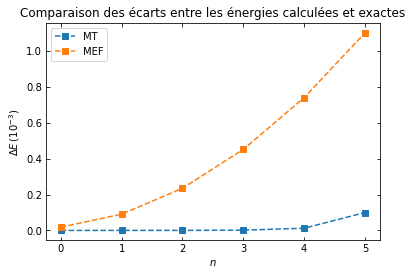

In [4]:
energies_exactes = np.array([n + 0.5 for n in range(6)]) # liste des énergies propres exactes

# calcul des écarts en énergie des deux méthodes
delta_E_mt = sol_mt[0] - energies_exactes
delta_E_mef = sol_mef[0] - energies_exactes

plt.figure()

plt.plot(range(6), 1000*delta_E_mt, linestyle="--", marker="s", label="MT")
plt.plot(range(6), 1000*delta_E_mef, linestyle="--", marker="s", label="MEF")

plt.title("Comparaison des écarts entre les énergies calculées et exactes", wrap=True)

plt.xlabel("$n$")
plt.ylabel("$\\Delta E \,(10^{-3})$")

plt.legend()

plt.show()